<h1 align='center' style="color: blue;">Individual Project - Spring 2022</h1>

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [ ]:
# !pip install --upgrade tensorflow

You can also check the version of it using the following code.

In [43]:
import tensorflow as tf
tf.__version__

'2.8.0'

Now, it's time to load the dataset

In [44]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [45]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

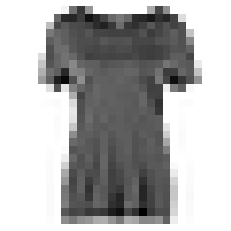

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [47]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [48]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


Now, it's your turn,

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#Task1

We will be using models from the previous assignments and some models discussed in calss to train on the data and compare them based on accuracy metrics.
Models being compared:


1.   Logistic Rgression
2.   Random Forest classifier(decision tree ensemble)
3.   MLPclassifier (Neural network based classifier)



In [49]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

1. Logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(solver='lbfgs')
model_logistic.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [51]:
y_train_pred = model_logistic.predict(X_train)
y_test_pred = model_logistic.predict(X_test)

In [52]:
X_test.shape

(10000, 784)

In [53]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
in_sample_acc = accuracy_score(y_train,y_train_pred, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_pred, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  86.32
Out-of-sample Accuracy:  84.11999999999999


Confusion matrix to get better idea on how the model is performing over different classes

In [56]:
cf_matrix = confusion_matrix(y_test,y_test_pred)
cf_matrix

array([[812,   5,  16,  46,   9,   0,  98,   0,  14,   0],
       [  2, 960,   1,  27,   4,   0,   4,   0,   2,   0],
       [ 18,   6, 737,  11, 140,   1,  78,   0,   9,   0],
       [ 25,  15,  15, 858,  44,   1,  37,   0,   5,   0],
       [  0,   3, 106,  33, 779,   1,  70,   0,   8,   0],
       [  1,   1,   0,   0,   0, 891,   0,  56,   9,  42],
       [139,   3, 129,  42, 114,   0, 550,   0,  23,   0],
       [  0,   0,   0,   0,   0,  36,   0, 933,   0,  31],
       [  3,   1,   7,  10,   2,   3,  21,   5, 947,   1],
       [  0,   0,   0,   0,   0,  13,   0,  39,   3, 945]])

In [57]:
classification_report(y_test,y_test_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81      1000\n           1       0.97      0.96      0.96      1000\n           2       0.73      0.74      0.73      1000\n           3       0.84      0.86      0.85      1000\n           4       0.71      0.78      0.74      1000\n           5       0.94      0.89      0.92      1000\n           6       0.64      0.55      0.59      1000\n           7       0.90      0.93      0.92      1000\n           8       0.93      0.95      0.94      1000\n           9       0.93      0.94      0.94      1000\n\n    accuracy                           0.84     10000\n   macro avg       0.84      0.84      0.84     10000\nweighted avg       0.84      0.84      0.84     10000\n'

2. RandomForest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. We choose this instead a single decision tree because ensemble methods generally work better.

In [15]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_train_pred = model_RFC.predict(X_train)
y_test_pred = model_RFC.predict(X_test)

In [19]:
in_sample_acc = accuracy_score(y_train,y_train_pred, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_pred, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  87.48


In [ ]:
cf_matrix = confusion_matrix(y_test,y_test_pred)
cf_matrix

In [17]:
classification_report(y_test,y_test_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.85      0.83      1000\n           1       0.99      0.96      0.98      1000\n           2       0.77      0.80      0.79      1000\n           3       0.87      0.90      0.89      1000\n           4       0.76      0.81      0.79      1000\n           5       0.98      0.96      0.97      1000\n           6       0.72      0.58      0.65      1000\n           7       0.92      0.95      0.94      1000\n           8       0.95      0.97      0.96      1000\n           9       0.95      0.95      0.95      1000\n\n    accuracy                           0.87     10000\n   macro avg       0.87      0.87      0.87     10000\nweighted avg       0.87      0.87      0.87     10000\n'

3. ANN(Artificial Neural Networks)

Perceptron based model with 10 layers and 50 perceptrons in each layer. Not too complex as we have a small dataset. Here we use adam optimizer which performs well generally compared to ‘lbfgs’, ‘sgd’

In [18]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier(solver='adam',random_state=0, 
                      hidden_layer_sizes=[50,10])
model_nn.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=[50, 10], random_state=0)

In [20]:
y_train_pred = model_nn.predict(X_train)
y_test_pred = model_nn.predict(X_test)

In [21]:
in_sample_acc = accuracy_score(y_train,y_train_pred, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_pred, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  92.66166666666666
Out-of-sample Accuracy:  86.22999999999999


In [ ]:
cf_matrix = confusion_matrix(y_test,y_test_pred)
cf_matrix

In [22]:
classification_report(y_test,y_test_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.80      0.81      1000\n           1       0.97      0.96      0.97      1000\n           2       0.71      0.83      0.76      1000\n           3       0.82      0.89      0.85      1000\n           4       0.83      0.72      0.77      1000\n           5       0.97      0.95      0.96      1000\n           6       0.68      0.61      0.64      1000\n           7       0.94      0.95      0.94      1000\n           8       0.96      0.95      0.96      1000\n           9       0.94      0.96      0.95      1000\n\n    accuracy                           0.86     10000\n   macro avg       0.86      0.86      0.86     10000\nweighted avg       0.86      0.86      0.86     10000\n'

Random forest classfier performs better out of the three based on accuracy. But the accuracies of ANN and RFC are really close.

#TASK 2

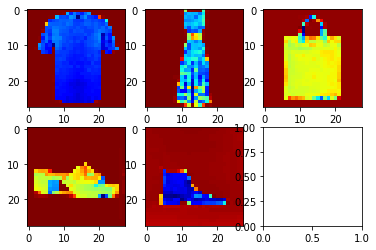

In [58]:
import matplotlib.image as image
import matplotlib.pyplot as plt
import cv2
image_files=["tshirt.jpeg","dress.jpeg","bag.jpeg","sandals.jpeg","ankleboot.jpeg"]
#setting labels
y_test=[0,3,8,5,9]
images=[]
for i in range(len(image_files)):
  image=plt.imread(image_files[i])
  x=cv2.resize(image, (28, 28)) 
  grayscale = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
  images.append(grayscale)
  
fig, ax = plt.subplots(2,3)

ax[0,0].imshow(images[0].reshape(28,28), cmap = 'jet')
ax[0,1].imshow(images[1].reshape(28,28), cmap = 'jet')
ax[0,2].imshow(images[2].reshape(28,28), cmap = 'jet')
ax[1,0].imshow(images[3].reshape(28,28), cmap = 'jet')
ax[1,1].imshow(images[4].reshape(28,28), cmap = 'jet')

In [61]:
# modifying the input data to fit the requirements of the model
import numpy as np
test_data=[]
for i in range(len(image_files)):
  test_data.append(images[i].reshape(784))
test_data=np.array(test_data)

In [59]:
#getting predictions on the test daat using the best model(RFC)
y_pred=model_RFC.predict(test_data)
y_pred

array([6, 6, 8, 8, 6], dtype=uint8)

In [35]:
y_test

[0, 3, 8, 5, 9]

In [60]:
#calculating accuracy
out_of_sample_acc = accuracy_score(y_test,y_pred, normalize = True) * 100 
out_of_sample_acc

20.0

We got 20 percent accuracy on the custom inputs. It is low because the images were not perfect i.e, not ideal when rescaled to 28*28, they lose information and get really pixelated. so ideally images with white background ones that can preserve features even when pixelated can give us better predictions

The coding was performed in google colab as the tensorflow has been established in the server of google colab and intstalling was challenging for the Macbook with M1-chip.